In [ ]:
!pip install callback

In [1]:
import numpy as np

import matplotlib.pyplot as plt



import pandas as pd

import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pathlib

from PIL import ImageFile

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [3]:
!unzip "/content/gdrive/MyDrive/dataset_pbl/train.zip"

Streaming output truncated to the last 5000 lines.
  inflating: valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: valid/nowildfire/-73.480722,45.518864.jpg  
  inflating: valid/nowildfire/-73.481149,45.563113.jpg  
  inflating: valid/nowildfire/-73.481422,45.559789.jpg  
  inflating: valid/nowildfire/-73.481565,45.467244.jpg  
  inflating: valid/nowildfire/-73.483407,45.637554.jpg  
  inflating: valid/nowildfire/-73.485899,45.454045.jpg  
  inflating: valid/nowildfire/-73.48709

In [4]:
pathTrain = "/content/train"
pathVal = "/content/valid"
pathTest = "/content/test"

<h3>Preprocessing</h3>

In [5]:
trainDatagen = ImageDataGenerator(rescale=1./255)
testDatagen = ImageDataGenerator(rescale=1./255)
validationDatagen = ImageDataGenerator(rescale=1./255)

In [6]:
#Target size chosen arbitrarily along with batch size
trainIter = trainDatagen.flow_from_directory(
    pathTrain,
    target_size=(256, 256),
    batch_size=16
)

Found 30250 images belonging to 2 classes.


In [7]:
testIter = testDatagen.flow_from_directory(
    pathTest,
    target_size=(256, 256),
    batch_size=16
)

Found 6300 images belonging to 2 classes.


In [8]:
validIter = validationDatagen.flow_from_directory(
    pathVal,
    target_size=(256, 256),
    batch_size=16
)

Found 6300 images belonging to 2 classes.


In [9]:
#the elements in each category
from collections import Counter
counter = Counter(trainIter.classes)
print(counter.items())

dict_items([(0, 14500), (1, 15750)])


In [11]:
print(trainIter.class_indices)

{'nowildfire': 0, 'wildfire': 1}


<h3>Modeling</h3>

Using first a simple CNN Model

In [16]:
# Dimensions of our images.
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3) # each image has 3 channels

# Epochs
epochsAmt = 30

# Number of images to read every iteration
batch_size = 64


# Total number of images for training and testing
train_num = 30250
test_num = 6300
valid_num = 6300

# Total number of steps in each epoch
train_steps = train_num // batch_size # integer division
test_steps  = test_num  // batch_size

# Total number of classes
num_classes = 2

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (256, 256, 3)
# Define the model
model = keras.Sequential(name='Improved-Wildfire-CNN')

# Add convolutional layers
model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add dropout for regularization
model.add(layers.Dropout(0.5))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(2, activation='softmax'))

model.summary()


Model: "Improved-Wildfire-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 6

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
elst = callbacks.EarlyStopping(monitor='val_loss', patience=5,mode='min')
save_ck = callbacks.ModelCheckpoint('/content/sample_data/cnnmodel.hdf5', save_best_only=True, monitor='val_loss', mode= 'min')

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = history = model.fit(trainIter,
                    batch_size=batch_size,
                    epochs=epochsAmt,
                    validation_data=(validIter),
                    steps_per_epoch = train_steps,
                    callbacks=[elst,save_ck],
                    validation_steps = test_steps)

Epoch 1/30
472/472 [==============================] - 28s 59ms/step - loss: 0.2951 - accuracy: 0.8794 - val_loss: 0.2431 - val_accuracy: 0.9011
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - 28s 59ms/step - loss: 0.2319 - accuracy: 0.9155 - val_loss: 0.1645 - val_accuracy: 0.9375
Epoch 3/30
472/472 [==============================] - 30s 63ms/step - loss: 0.2083 - accuracy: 0.9249 - val_loss: 0.1674 - val_accuracy: 0.9375
Epoch 4/30
472/472 [==============================] - 27s 56ms/step - loss: 0.1876 - accuracy: 0.9307 - val_loss: 0.1577 - val_accuracy: 0.9381
Epoch 5/30
472/472 [==============================] - 25s 53ms/step - loss: 0.1824 - accuracy: 0.9321 - val_loss: 0.1369 - val_accuracy: 0.9452
Epoch 6/30
472/472 [==============================] - 27s 57ms/step - loss: 0.1715 - accuracy: 0.9352 - val_loss: 0.1470 - val_accuracy: 0.9503
Epoch 7/30
472/472 [==============================] - 26s 56ms/step - loss: 0.1712 - accuracy: 0.9415 - val_loss: 0.1308 - val_accuracy: 0.9541
Epoch 8/30
472/472 [==============================] - 25s 54ms/step - loss: 0.1609 - accuracy: 0.9421 - val_loss: 0.1277 - val_accuracy: 0.9509
Epo

In [ ]:
result = model.evaluate(testIter)

In [ ]:
plt.plot(history.history['accuracy'], label = 'train',)
plt.plot(history.history['val_accuracy'], label = 'valid')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy Scores')

plt.show()

In [ ]:
testIter.reset()
images, labels =  testIter.next()
y_pred = model.predict(images)

In [ ]:
!pip install SomeLibrary

ERROR: Could not find a version that satisfies the requirement SomeLibrary (from versions: none)
ERROR: No matching distribution found for SomeLibrary


In [ ]:
y_pred

In [ ]:
labels

1/1 [==============================] - 0s 23ms/step


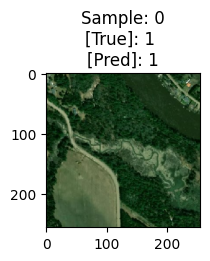

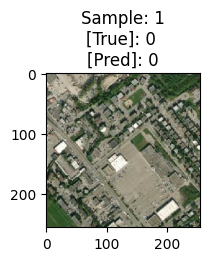

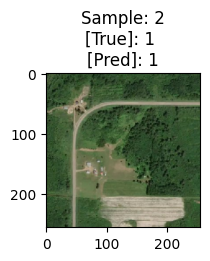

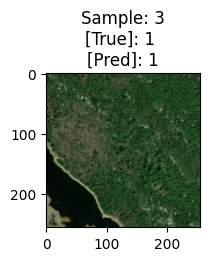

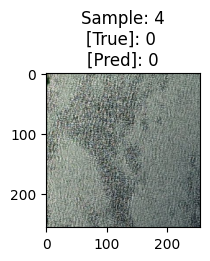

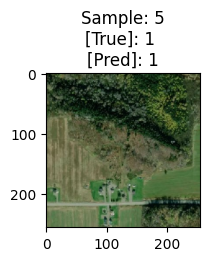

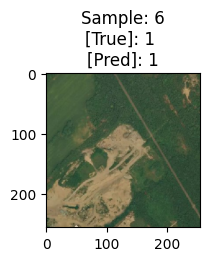

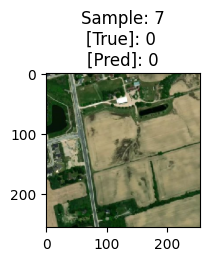

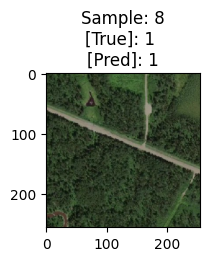

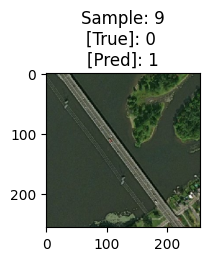

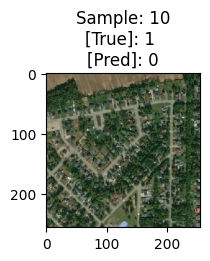

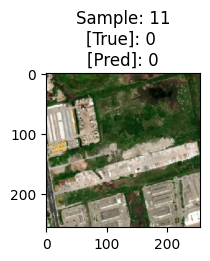

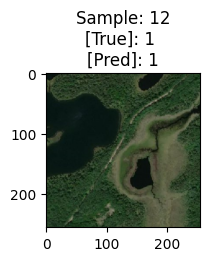

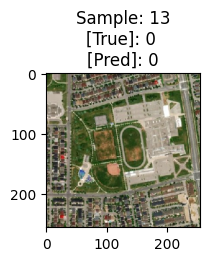

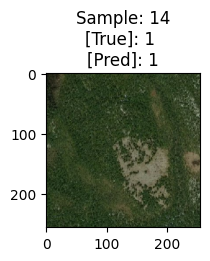

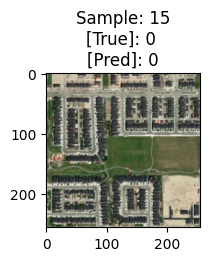

In [ ]:
testIter.reset()
images, labels =  testIter.next()
y_pred = model.predict(images)

for idx, img in enumerate(images):
    plt.figure(figsize = (2, 2))
    pred_label=str(y_pred[idx].argmax())
    true_label=str(labels[idx].argmax())
    plt.title('Sample: '+str(idx) + "\n[True]: "+true_label + " \n[Pred]: "+ pred_label)
    plt.imshow(img)
    plt.show()

## AlexNet CNN

In [ ]:
#preprocessing
trainDatagen = ImageDataGenerator(rescale=1./227) #May need to rescale to 255
testDatagen = ImageDataGenerator(rescale=1./227)
validationDatagen = ImageDataGenerator(rescale=1./227)

In [ ]:
trainIter = trainDatagen.flow_from_directory(
    pathTrain,
    target_size=(227, 227),
    batch_size=32 #Tune this parameter
)

Found 30250 images belonging to 2 classes.


In [ ]:
testIter = testDatagen.flow_from_directory(
    pathTest,
    target_size=(227, 227),
    batch_size=32
)

Found 6300 images belonging to 2 classes.


In [ ]:
validIter = validationDatagen.flow_from_directory(
    pathVal,
    target_size=(227, 227),
    batch_size=32
)

Found 6300 images belonging to 2 classes.


In [ ]:
#the elements in each category
from collections import Counter
counter = Counter(trainIter.classes)
print(counter.items())

dict_items([(0, 14500), (1, 15750)])


In [ ]:
trainIter.reset()

batchX, batchy = trainIter.next()
print("Batch shape of X = " + str(batchX.shape) + ", Xmin = "+str(batchX.min()) + ", Xmax = "+str(batchX.max()))
print("Batch shape of Y = " + str(batchy.shape) + ", ymin = "+str(batchy.min()) + ", ymax = "+str(batchy.max()))

Batch shape of X = (32, 227, 227, 3), Xmin = 0.0, Xmax = 1.123348
Batch shape of Y = (32, 2), ymin = 0.0, ymax = 1.0


In [ ]:
print(trainIter.class_indices)

{'nowildfire': 0, 'wildfire': 1}


In [ ]:
# Dimensions of our images.
img_width, img_height = 227, 227
input_shape = (img_width, img_height, 3) # each image has 3 channels

# Epochs
epochsAmt = 10

# Number of images to read every iteration
batch_size = 32 #Tune this Parameter

# Total number of images for training and testing
train_num = 30250
test_num = 6300
valid_num = 6300
# Total number of steps in each epoch
train_steps = train_num // batch_size # integer division
test_steps  = test_num  // batch_size

# Total number of classes
num_classes = 2

In [ ]:
model_alexnet = keras.Sequential(name = 'Wildfire-AlexNet')

model_alexnet.add(layers.Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = input_shape))

model_alexnet.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model_alexnet.add(layers.Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), activation = 'relu', padding = 'same'))

model_alexnet.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model_alexnet.add(layers.Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))

model_alexnet.add(layers.Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model_alexnet.add(layers.Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))

model_alexnet.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model_alexnet.add(layers.Flatten())

model_alexnet.add(layers.Dense(4096, activation = 'relu'))

model_alexnet.add(layers.Dropout(0.5))

model_alexnet.add(layers.Dense(4096, activation = 'relu'))

model_alexnet.add(layers.Dropout(0.5))

model_alexnet.add(layers.Dense(2, activation = 'softmax'))

model_alexnet.summary()

Model: "Wildfire-AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)  

In [ ]:
from keras import optimizers
# Define optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_alexnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
elst = callbacks. EarlyStopping(monitor='val_loss', patience=5,mode='min')
save_ck = callbacks.ModelCheckpoint('/content/sample_data/alexnet.hdf5', save_best_only=True, monitor='val_loss', mode= 'min')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Enable loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./227)
test_datagen = ImageDataGenerator(rescale=1./227)

train_iter = train_datagen.flow_from_directory(
    pathTrain,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

valid_iter = test_datagen.flow_from_directory(
    pathVal,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Train the model
history = model_alexnet.fit(
    train_iter,
    batch_size=batch_size,
    epochs=epochsAmt,
    validation_data=valid_iter,
    steps_per_epoch=train_steps,
    validation_steps=test_steps)


Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Epoch 1/10
945/945 [==============================] - 104s 102ms/step - loss: 0.3600 - accuracy: 0.8473 - val_loss: 0.2514 - val_accuracy: 0.8930
Epoch 2/10
945/945 [==============================] - 100s 106ms/step - loss: 0.2549 - accuracy: 0.9013 - val_loss: 0.1797 - val_accuracy: 0.9281
Epoch 3/10
945/945 [==============================] - 95s 100ms/step - loss: 0.2143 - accuracy: 0.9169 - val_loss: 0.2120 - val_accuracy: 0.9152
Epoch 4/10
945/945 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9230

In [ ]:
result = model_alexnet.evaluate(testIter)

In [ ]:
plt.plot(history.history['accuracy'], label = 'train',)
plt.plot(history.history['val_accuracy'], label = 'valid')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy Scores')

plt.show()

In [ ]:
testIter.reset()
images, labels =  testIter.next()
y_pred = model_alexnet.predict(images)

for idx, img in enumerate(images):
    plt.figure(figsize = (2, 2))
    pred_label=str(y_pred[idx].argmax())
    true_label=str(labels[idx].argmax())
    plt.title('Sample: '+str(idx) + "\n[True]: "+true_label + " \n[Pred]: "+ pred_label)
    plt.imshow(img)
    plt.show()